In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.subplots import make_subplots

!ls 

data_analysis.ipynb stationary.txt      stationary_on.txt
driving.txt         stationary_off.txt  stationary_on1.txt


# Analysing the readings recorded when driving
## Includes the following: 
- driving over potholes
- driving at constant speed (sometimes, not always because that's more of a theoretical thing. In the real world, you'd still be able to record vibrations from the running engine, uneven road, braking, turns etc.)
- standing still at red light with engine on

In [29]:
driving_df = pd.read_csv("driving.txt")
driving_df.head()

Timestamp  Ax(m/s^2)  Ay(m/s^2)  Az(m/s^2)  Gx(deg/s)  Gy(deg/s)  \
0  1.745410e+09    -0.1460    -0.0646    10.5512    -2.7252    -0.2061   
1  1.745410e+09    -0.3184    -0.0287    10.2376    -3.6947     0.6412   
2  1.745410e+09    -0.1628     0.1700     9.7181    -5.8473     0.8321   
3  1.745410e+09    -0.2490     0.0646     9.7444    -3.7023     0.3435   
4  1.745410e+09    -0.0934    -0.0934    10.6159    -3.3053     0.8779   

   Gz(deg/s)  
0     0.7328  
1     0.5954  
2     0.6489  
3     0.6260  
4     0.3206

In [30]:
driving_df.describe()

Timestamp    Ax(m/s^2)    Ay(m/s^2)    Az(m/s^2)    Gx(deg/s)  \
count  9.554000e+03  9554.000000  9554.000000  9554.000000  9554.000000   
mean   1.745410e+09    -0.469858    -0.107661     9.782117    -2.027747   
std    2.932825e+02     0.739621     0.777090     1.583091     3.368647   
min    1.745410e+09    -7.053300    -7.007800    -5.135600   -78.412200   
25%    1.745410e+09    -0.814000    -0.459700     9.069200    -3.150775   
50%    1.745410e+09    -0.457300    -0.143700     9.787500    -2.053400   
75%    1.745410e+09    -0.088600     0.294500    10.498600    -0.916000   
max    1.745411e+09    19.612700    19.474400    19.612700    93.038200   

         Gy(deg/s)    Gz(deg/s)  
count  9554.000000  9554.000000  
mean     -0.636284     0.384861  
std       6.023432     7.074356  
min    -196.709900  -214.183200  
25%      -2.626000    -0.114500  
50%      -0.687000     0.358800  
75%       1.374000     0.885500  
max      72.091600   211.236600

In [32]:
print(driving_df.columns.to_list())

# Step 1 : Convert time to human-readable form
driving_df['Timestamp'] = pd.to_datetime(driving_df['Timestamp'], unit='s')
# Step 2: Localize to UTC and convert to IST
driving_df['Timestamp'] = driving_df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

driving_df.set_index("Timestamp",inplace=True) 
# driving_df.reset_index(inplace=True)


['Timestamp', 'Ax(m/s^2)', 'Ay(m/s^2)', 'Az(m/s^2)', 'Gx(deg/s)', 'Gy(deg/s)', 'Gz(deg/s)']


In [33]:
driving_df.head()

Ax(m/s^2)  Ay(m/s^2)  Az(m/s^2)  \
Timestamp                                                              
2025-04-23 17:29:05.349800192+05:30    -0.1460    -0.0646    10.5512   
2025-04-23 17:29:05.455800064+05:30    -0.3184    -0.0287    10.2376   
2025-04-23 17:29:05.561799936+05:30    -0.1628     0.1700     9.7181   
2025-04-23 17:29:05.667900160+05:30    -0.2490     0.0646     9.7444   
2025-04-23 17:29:05.773900032+05:30    -0.0934    -0.0934    10.6159   

                                     Gx(deg/s)  Gy(deg/s)  Gz(deg/s)  
Timestamp                                                             
2025-04-23 17:29:05.349800192+05:30    -2.7252    -0.2061     0.7328  
2025-04-23 17:29:05.455800064+05:30    -3.6947     0.6412     0.5954  
2025-04-23 17:29:05.561799936+05:30    -5.8473     0.8321     0.6489  
2025-04-23 17:29:05.667900160+05:30    -3.7023     0.3435     0.6260  
2025-04-23 17:29:05.773900032+05:30    -3.3053     0.8779     0.3206

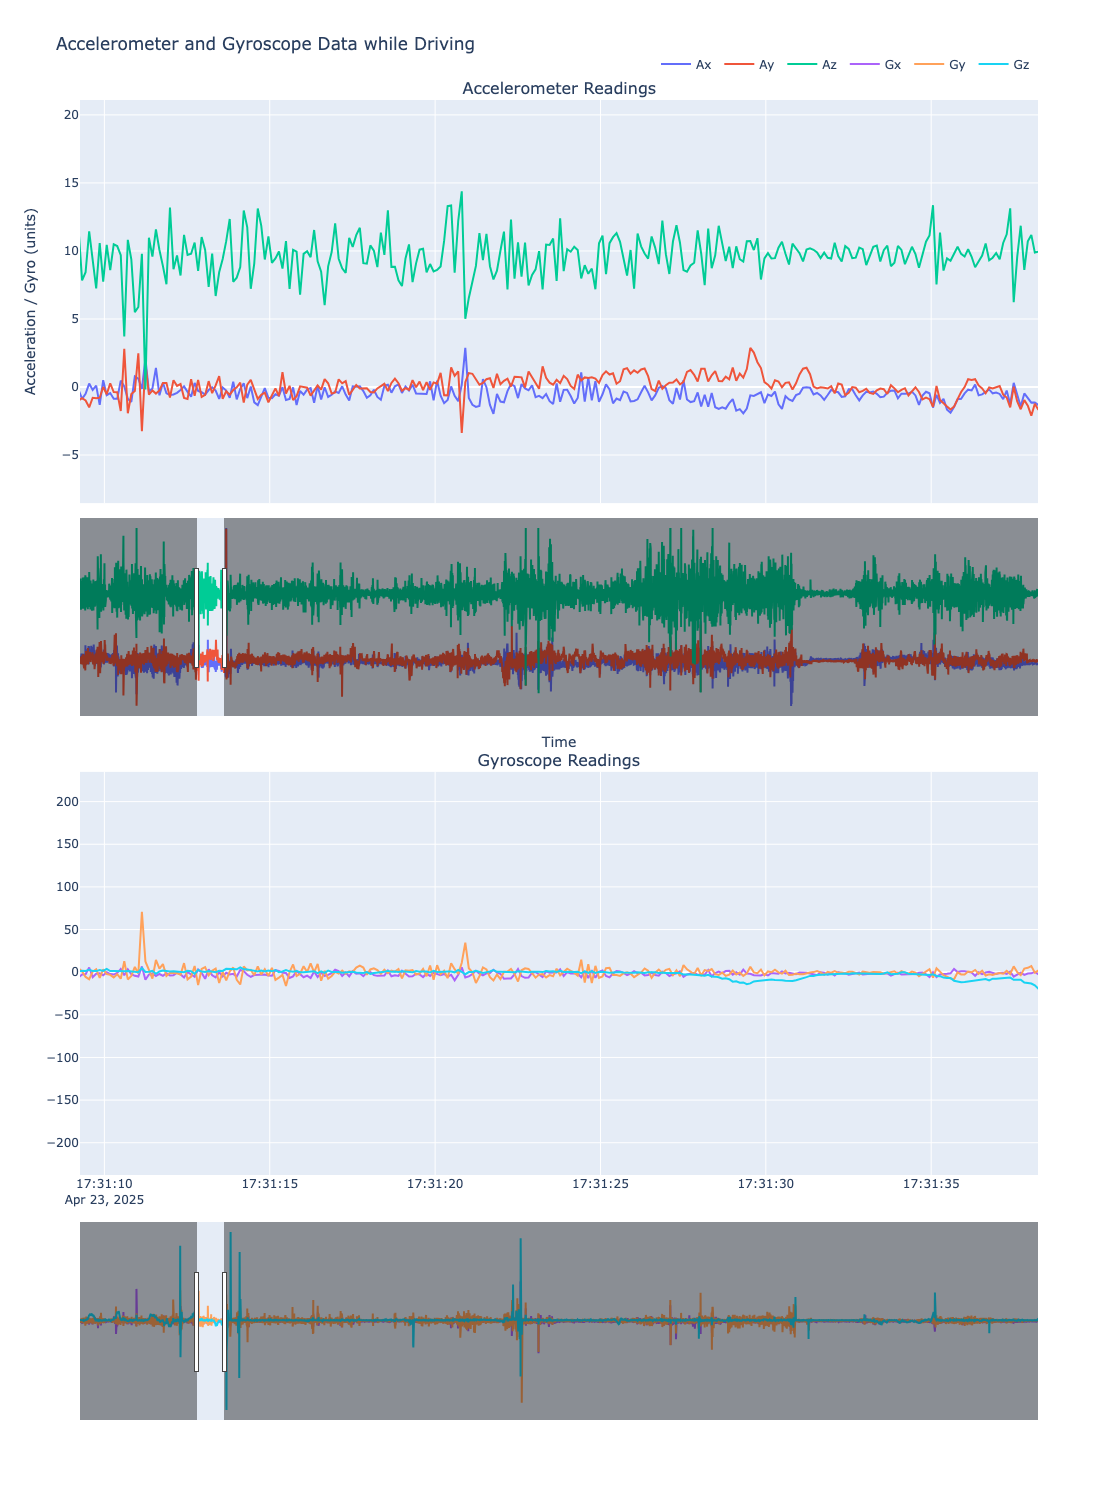

In [34]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Accelerometer Readings", "Gyroscope Readings"))

# Accelerometer traces
fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Ax(m/s^2)'], name='Ax', mode='lines'), row=1, col=1)

fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Ay(m/s^2)'], name='Ay', mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Az(m/s^2)'], name='Az', mode='lines'), row=1, col=1)

# Gyroscope traces
fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Gx(deg/s)'], name='Gx', mode='lines'), row=2, col=1)
fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Gy(deg/s)'], name='Gy', mode='lines'), row=2, col=1)
fig.add_trace(go.Scatter(x=driving_df.index, y=driving_df['Gz(deg/s)'], name='Gz', mode='lines'), row=2, col=1)


# Update layout
fig.update_layout(
    height=1500,
    title="Accelerometer and Gyroscope Data while Driving",
    xaxis_title="Time",
    yaxis_title="Acceleration / Gyro (units)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode="x unified"
)

# Enable zooming & panning
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

# Analysing the readings recorded when ENGINE OFF
<!-- ## Includes the following:  -->

In [35]:
st_off_df = pd.read_csv('stationary_off.txt')
st_off_df.head()

Timestamp  Ax(m/s^2)  Ay(m/s^2)  Az(m/s^2)  Gx(deg/s)  Gy(deg/s)  \
0  1.745409e+09     0.1724     0.2083     9.8904    -1.8702    -0.7328   
1  1.745409e+09     0.1676     0.2394     9.8641    -1.9466    -0.5725   
2  1.745409e+09     0.2274     0.2131     9.9144    -1.8321    -0.8092   
3  1.745409e+09     0.1580     0.1915     9.8210    -2.0458    -0.7405   
4  1.745409e+09     0.1317     0.2274     9.8330    -2.0534    -0.6870   

   Gz(deg/s)  
0     0.2519  
1     0.1679  
2     0.4885  
3     0.3053  
4     0.1527

In [36]:
st_off_df.describe()

Timestamp   Ax(m/s^2)   Ay(m/s^2)   Az(m/s^2)   Gx(deg/s)  \
count  6.360000e+02  636.000000  636.000000  636.000000  636.000000   
mean   1.745409e+09    0.158450    0.222256    9.844916   -2.030535   
std    1.953961e+01    0.067243    0.034752    0.062125    0.641296   
min    1.745409e+09    0.000000    0.019200    9.653400   -3.908400   
25%    1.745409e+09    0.122100    0.200500    9.815600   -2.114500   
50%    1.745409e+09    0.158000    0.222700    9.847400   -2.053400   
75%    1.745409e+09    0.196300    0.244200    9.885700   -1.969500   
max    1.745409e+09    0.304100    0.409400   10.022100   -0.007600   

        Gy(deg/s)   Gz(deg/s)  
count  636.000000  636.000000  
mean    -0.636162    0.273505  
std      0.118433    0.273121  
min     -1.045800   -1.916000  
25%     -0.717600    0.196575  
50%     -0.633600    0.282400  
75%     -0.557300    0.366400  
max     -0.290100    1.946600

In [37]:
st_off_df['Timestamp'] = pd.to_datetime(st_off_df['Timestamp'], unit='s') # convert timestamp to human readable

In [38]:
 # convert to IST
st_off_df['Timestamp'] = st_off_df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
 #  Set Timestamp as index of the df
st_off_df.set_index('Timestamp',inplace =True)


st_off_df.head()

Ax(m/s^2)  Ay(m/s^2)  Az(m/s^2)  \
Timestamp                                                              
2025-04-23 17:24:54.956199936+05:30     0.1724     0.2083     9.8904   
2025-04-23 17:24:55.062299904+05:30     0.1676     0.2394     9.8641   
2025-04-23 17:24:55.168400128+05:30     0.2274     0.2131     9.9144   
2025-04-23 17:24:55.274599936+05:30     0.1580     0.1915     9.8210   
2025-04-23 17:24:55.380700160+05:30     0.1317     0.2274     9.8330   

                                     Gx(deg/s)  Gy(deg/s)  Gz(deg/s)  
Timestamp                                                             
2025-04-23 17:24:54.956199936+05:30    -1.8702    -0.7328     0.2519  
2025-04-23 17:24:55.062299904+05:30    -1.9466    -0.5725     0.1679  
2025-04-23 17:24:55.168400128+05:30    -1.8321    -0.8092     0.4885  
2025-04-23 17:24:55.274599936+05:30    -2.0458    -0.7405     0.3053  
2025-04-23 17:24:55.380700160+05:30    -2.0534    -0.6870     0.1527

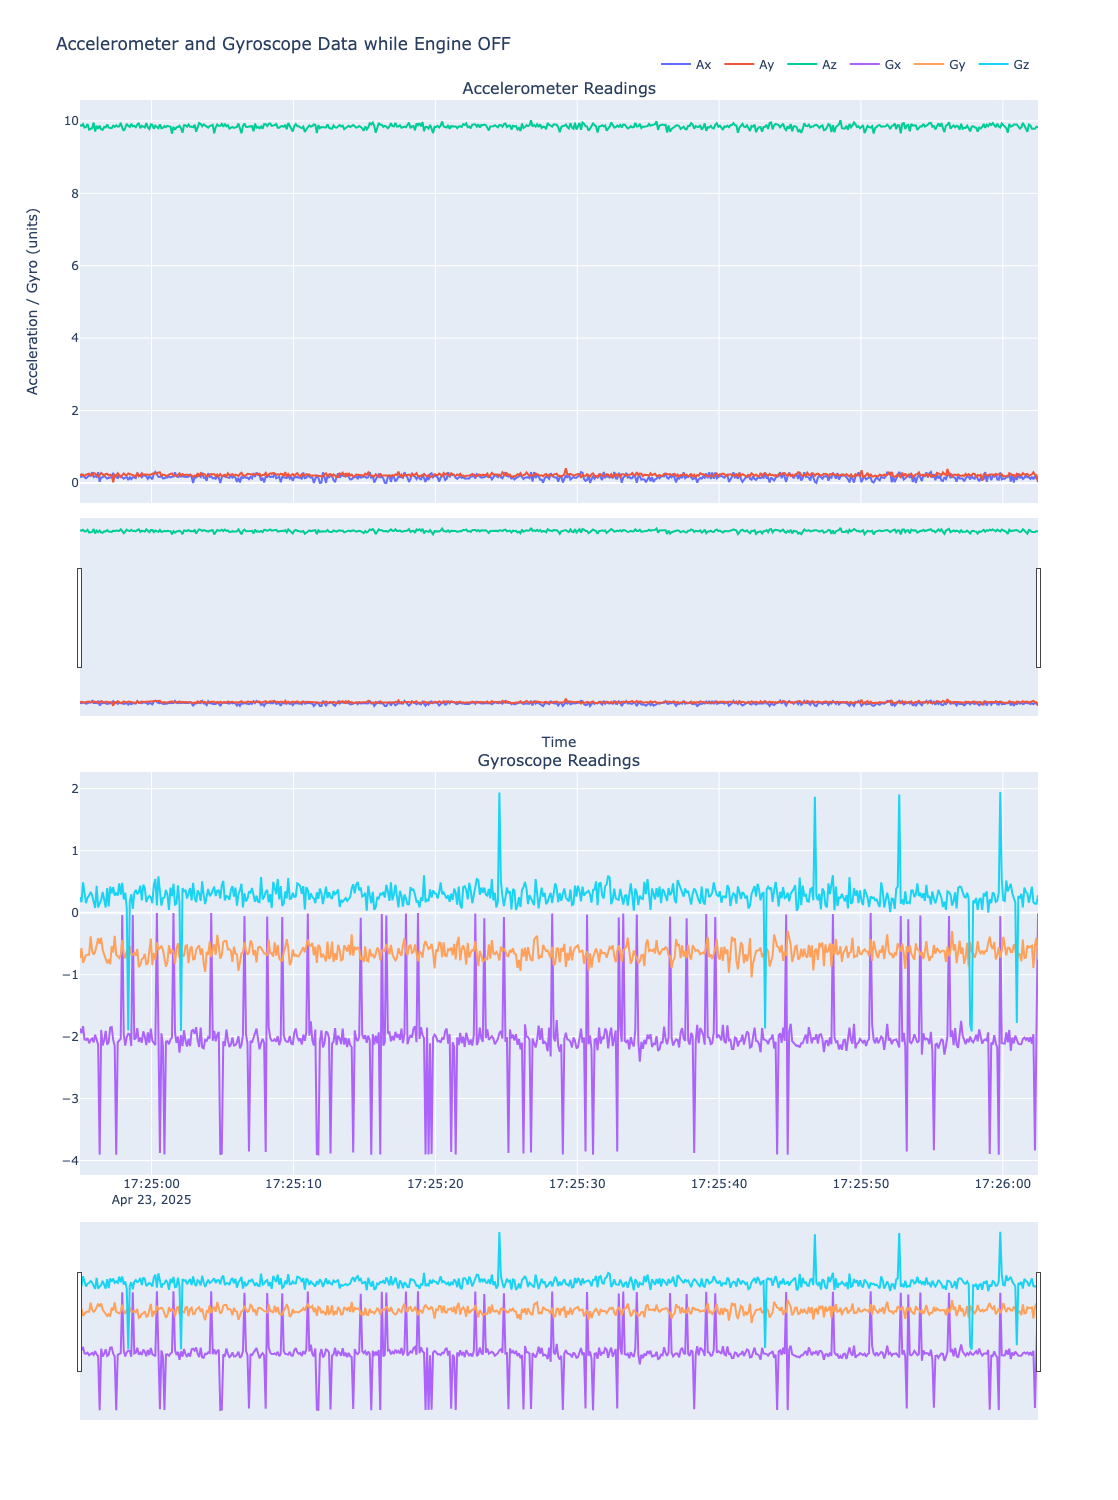

In [39]:
fig2 = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Accelerometer Readings", "Gyroscope Readings"))

# Accelerometer traces
fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Ax(m/s^2)'], name='Ax', mode='lines'), row=1, col=1)

fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Ay(m/s^2)'], name='Ay', mode='lines'), row=1, col=1)
fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Az(m/s^2)'], name='Az', mode='lines'), row=1, col=1)

# Gyroscope traces
fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Gx(deg/s)'], name='Gx', mode='lines'), row=2, col=1)
fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Gy(deg/s)'], name='Gy', mode='lines'), row=2, col=1)
fig2.add_trace(go.Scatter(x=st_off_df.index, y=st_off_df['Gz(deg/s)'], name='Gz', mode='lines'), row=2, col=1)


# Update layout
fig2.update_layout(
    height=1500,
    title="Accelerometer and Gyroscope Data while Engine OFF",
    xaxis_title="Time",
    yaxis_title="Acceleration / Gyro (units)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode="x unified"
)

# Enable zooming & panning
fig2.update_xaxes(rangeslider_visible=True)

# Show the plot
fig2.show()